# <font size = 8 color ='336EFF'>Random Search</font>

Import Libraries

In [1]:
# Random search of a one-dimensional objective function
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

#Define Objective Function

In [2]:
# objective function
def objective(x):
    return x[0]**2

Define auxiliary function for plotting

In [3]:
def plotCurrentSolution(bounds, x_p, x_best):
    # sample input range uniformly at 0.1 increments
    inputs = np.arange(bounds[0, 0], bounds[0, 1], 0.1)
    # create a line plot of input vs result
    plt.clf()
    plt.plot(inputs, [objective([x]) for x in inputs], '--')
    # draw a vertical line at the optimal input
    plt.axvline(x=x_p, ls='--', color='red')
    plt.axvline(x=x_best, ls='--', color='black')
    # plot the sample as black circles
    f_xbest = objective([x_best])
    plt.plot(x_best, f_xbest, 'o', color='black')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Solution: {x_best}, Evaluation: {f_xbest}')
    plt.draw()#plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.01)

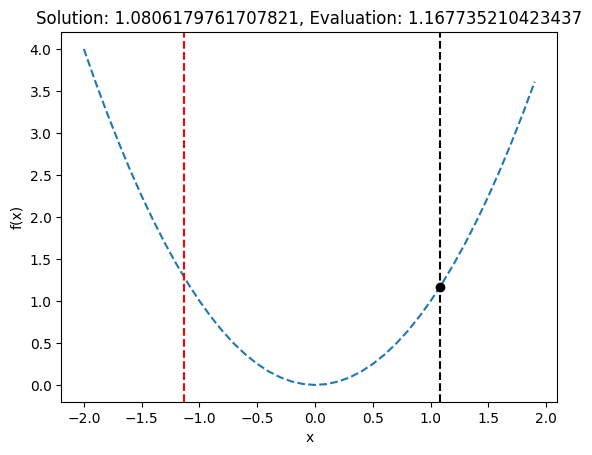

In [4]:
bounds = np.asarray([[-2.0, 2.0]])
x1 = bounds[0, 0] + np.random.rand()*(bounds[0, 1] - bounds[0, 0])
xb = bounds[0, 0] + np.random.rand()*(bounds[0, 1] - bounds[0, 0])
plotCurrentSolution(bounds, x1, xb)

# Define Random search function

In [5]:
# Random search algorithm
def randomsearch(f_x, bounds, n_iterations):
    iter = 0
    # start with current best solution
    xb = bounds[0, 0] + np.random.rand()*(bounds[0, 1] - bounds[0, 0])
    fbest = f_x([xb])
    while iter<= n_iterations:
        # generate an new point
        xn = bounds[0, 0] + np.random.rand()*(bounds[0, 1] - bounds[0, 0])
        f_xn = f_x([xn])
        if f_xn < fbest:
            xb = xn
            fbest = f_xn
        plotCurrentSolution(bounds, xn, xb)
        iter += 1
    return xb

Define Main Function

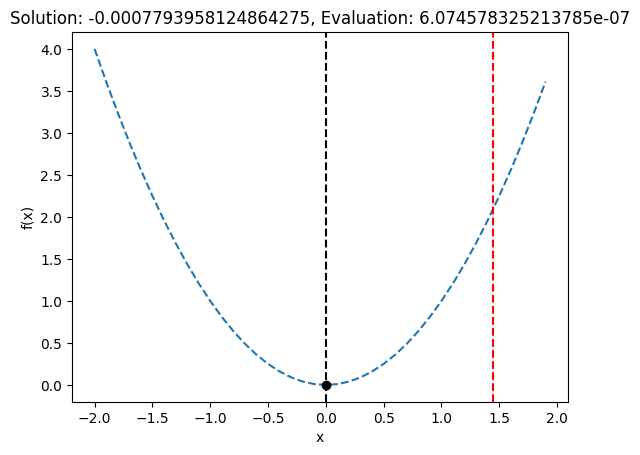

Solution: -0.0007793958124864275, Evaluation: 6.074578325213785e-07


In [6]:
# define range for input
bounds = np.asarray([[-2, 2]])
# define the maximum number of iterations
n_iterations = 100
sol = randomsearch(objective, bounds, n_iterations)
f_sol = objective([sol])
print(f'Solution: {sol}, Evaluation: {f_sol}')